<a href="https://colab.research.google.com/github/sgangavaram/FMML2023/blob/LAB-1/Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FMML Module 1, Lab 1<br>



In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=bb07470c6f1d0946abadd82ff50871df2526dba21b5204ef5c23b27f391d4d0a
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:
topic3 = 'Art and culture'
topic4 = 'Health and fitness'

wikipedia.set_lang('de')

ger1 = wikipedia.page(topic3).content
ger2 = wikipedia.page(topic4).content

wikipedia.set_lang('es')

sp1 = wikipedia.page(topic3).content
sp2 = wikipedia.page(topic4).content

In [ ]:
sp1

'Arte y cultura son conceptos muy habitualmente emparejados[1]\u200b para referirse a los productos artísticos y culturales que definen los rasgos más importantes de una civilización, especialmente en sus componentes más elitistas y subliminales de osoes (la alta cultura), pero también en lo que define su forma de vida y su manera de entender a sí misma y al mundo (cosmovisión, ideología).[2]\u200b\nMientras que el uso más habitual del término "arte" es mayoritariamente restringido en su uso bibliográfico a las denominadas tradicionalmente artes mayores (pintura, escultura y arquitectura), las bellas artes clásicas incluyen también la danza, la música y la literatura; y se han añadido "nuevas artes" (séptimo arte -cine-, octavo arte o noveno arte -fotografía, cómic, televisión, publicidad-). Otro tipo de artes, denominadas artes menores o aplicadas se han revalorizado desde el primer tercio del siglo XX con el surgimiento del moderno concepto de diseño en la Bauhaus. Simultáneamente, s

In [ ]:
def cleanup(text):
  text = text.lower()
  text = re.sub('[^a-z]+', '', text)
  return text

In [ ]:
ger1 = cleanup(ger1)
ger2 = cleanup(ger2)
sp1 = cleanup(sp1)
sp2 = cleanup(sp2)

In [ ]:
print(sp1)

arteyculturasonconceptosmuyhabitualmenteemparejadosparareferirsealosproductosartsticosyculturalesquedefinenlosrasgosmsimportantesdeunacivilizacinespecialmenteensuscomponentesmselitistasysubliminalesdeosoeslaaltaculturaperotambinenloquedefinesuformadevidaysumaneradeentenderasmismayalmundocosmovisinideologamientrasqueelusomshabitualdeltrminoarteesmayoritariamenterestringidoensuusobibliogrficoalasdenominadastradicionalmenteartesmayorespinturaesculturayarquitecturalasbellasartesclsicasincluyentambinladanzalamsicaylaliteraturaysehanaadidonuevasartessptimoartecineoctavoarteonovenoartefotografacmictelevisinpublicidadotrotipodeartesdenominadasartesmenoresoaplicadassehanrevalorizadodesdeelprimerterciodelsigloxxconelsurgimientodelmodernoconceptodediseoenlabauhaussimultneamentesehavaciadodecontenidoelpropioconceptodeartecomoconsecuenciadelapropiateoradelartedelasvanguardiasdemodoquepudohablarsedequelasartesnomuerenelconceptodeculturaesanmsgenricaeincluyetodaslasactividadeshumanasdesdelagastronoma

In [ ]:
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st
def key2string(keys):
  return [tuple2string(i) for i in keys]
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

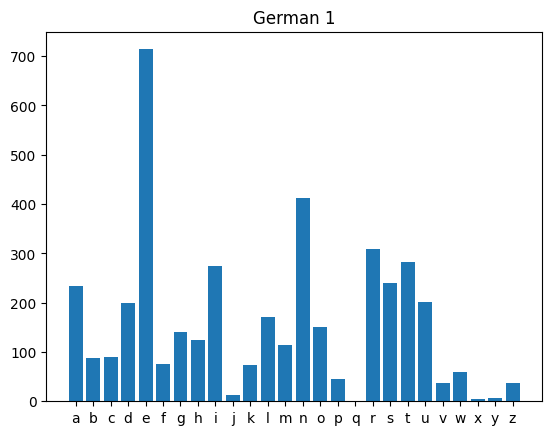

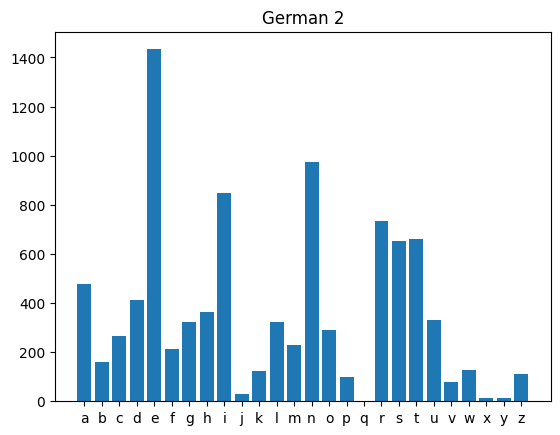

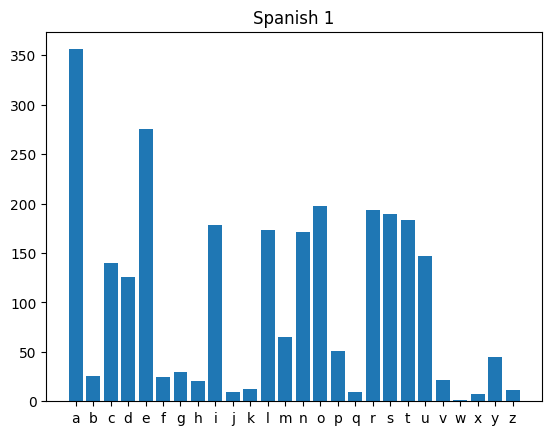

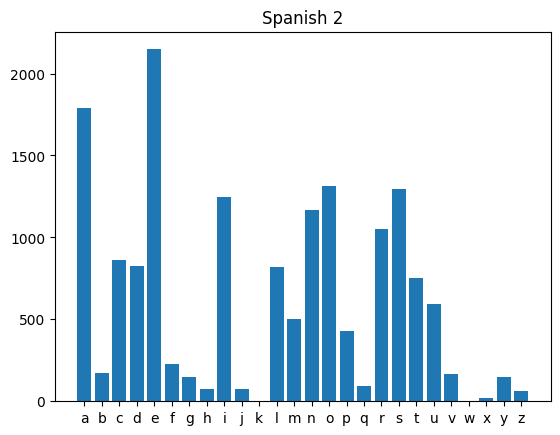

In [ ]:
unigram_ger1 = Counter(ngrams(ger1,1))
plothistogram(unigram_ger1)
plt.title('German 1')
plt.show()
unigram_ger2 = Counter(ngrams(ger2,1))
plothistogram(unigram_ger2)
plt.title('German 2')
plt.show()
unigram_sp1 = Counter(ngrams(sp1,1))
plothistogram(unigram_sp1)
plt.title('Spanish 1')
plt.show()
unigram_sp2 = Counter(ngrams(sp2,1))
plothistogram(unigram_sp2)
plt.title('Spanish 2')
plt.show()

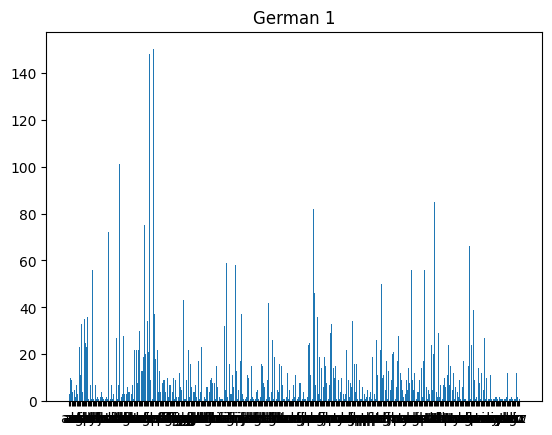

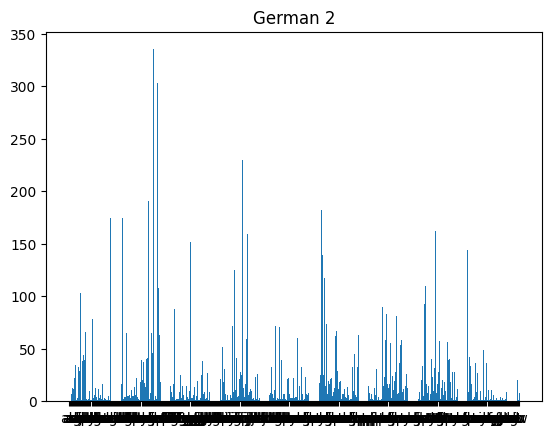

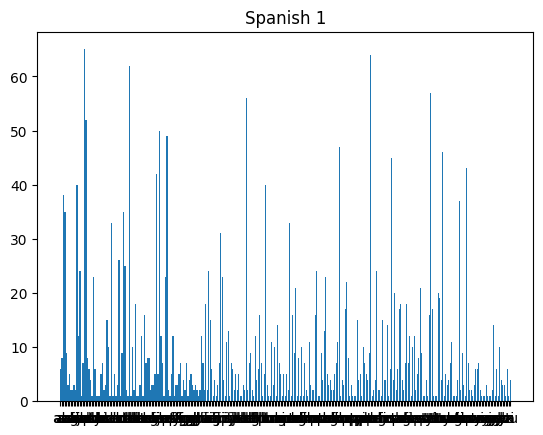

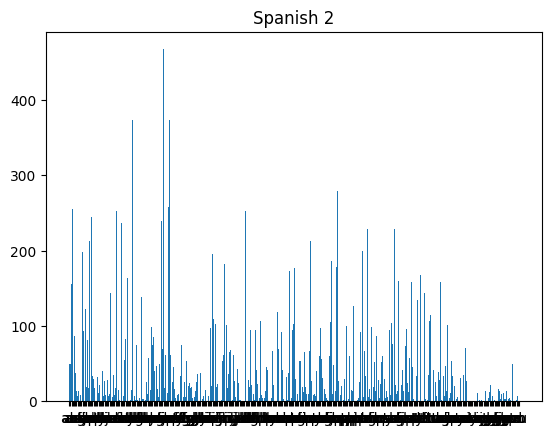

In [ ]:
bigram_ger1 = Counter(ngrams(ger1,2))
plothistogram(bigram_ger1)
plt.title('German 1')
plt.show()

bigram_ger2 = Counter(ngrams(ger2,2))
plothistogram(bigram_ger2)
plt.title('German 2')
plt.show()

bigram_sp1 = Counter(ngrams(sp1,2))
plothistogram(bigram_sp1)
plt.title('Spanish 1')
plt.show()

bigram_sp2 = Counter(ngrams(sp2,2))
plothistogram(bigram_sp2)
plt.title('Spanish 2')
plt.show()

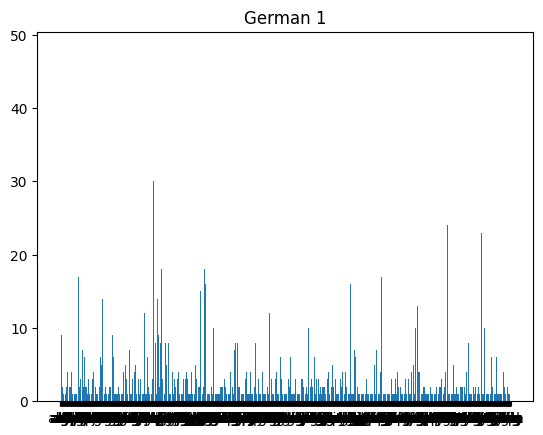

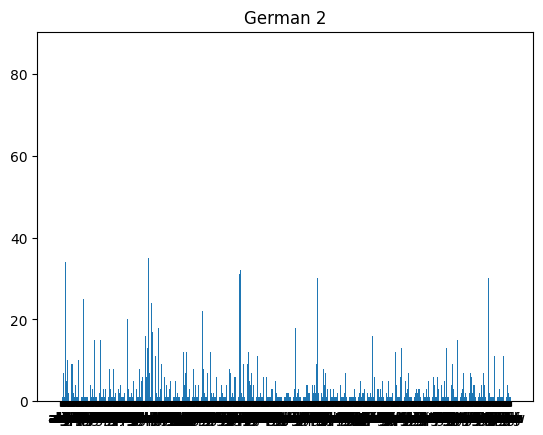

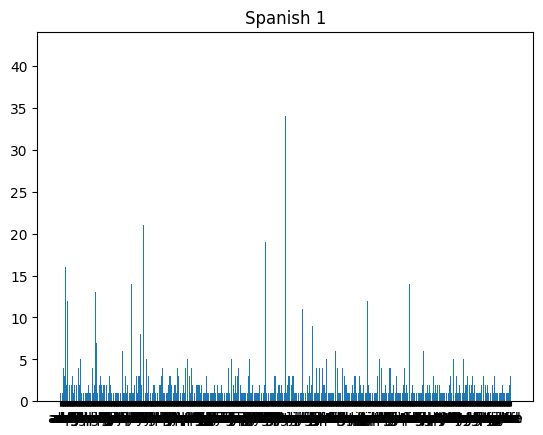

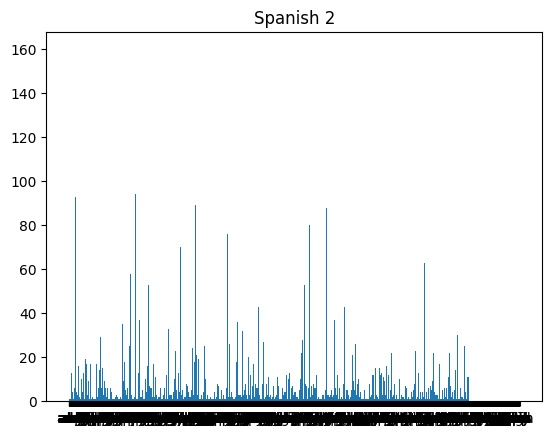

In [ ]:
trigram_ger1 = Counter(ngrams(ger1,3))
plothistogram(trigram_ger1)
plt.title('German 1')
plt.show()

trigram_ger2 = Counter(ngrams(ger2,3))
plothistogram(trigram_ger2)
plt.title('German 2')
plt.show()

trigram_sp1 = Counter(ngrams(sp1,3))
plothistogram(trigram_sp1)
plt.title('Spanish 1')
plt.show()

trigram_sp2 = Counter(ngrams(sp2,3))
plothistogram(trigram_sp2)
plt.title('Spanish 2')
plt.show()

In [ ]:
def plotbihistogram(ngram):
  fre = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      fre[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(fre, cmap = 'jet')
  return fre

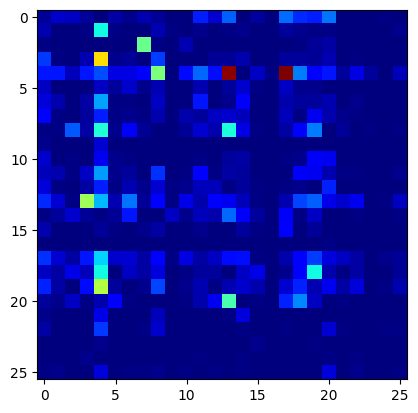

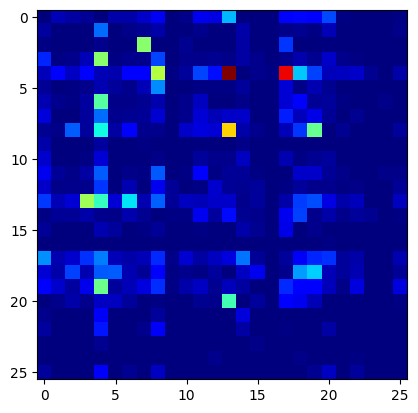

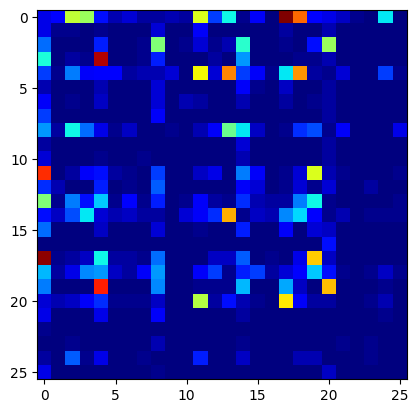

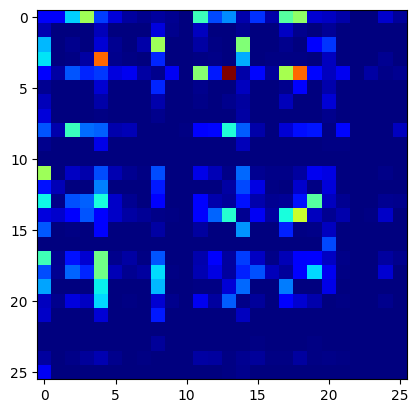

In [ ]:
biger1 = plotbihistogram(bigram_ger1)
plt.show()
biger2 = plotbihistogram(bigram_ger2)
plt.show()
bisp1 = plotbihistogram(bigram_sp1)
plt.show()
bisp2 = plotbihistogram(bigram_sp2)

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ii):
  ii = int(ii)
  i = int(ii/26)
  j = int(ii%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nGerman 1:')
ShowTopN(biger1)
print('\nGerman 2:')
ShowTopN(biger2)
print('\nSpanish 1:')
ShowTopN(bisp1)
print('\nSpanish 2:')
ShowTopN(bisp2)


German 1:
('e', 'r') : 150.0
('e', 'n') : 148.0
('d', 'e') : 101.0
('t', 'e') : 85.0
('n', 'd') : 82.0
('e', 'i') : 75.0
('c', 'h') : 72.0
('u', 'n') : 66.0
('i', 'e') : 59.0
('i', 'n') : 58.0

German 2:
('e', 'n') : 335.0
('e', 'r') : 303.0
('i', 'n') : 230.0
('e', 'i') : 191.0
('n', 'd') : 182.0
('d', 'e') : 174.0
('c', 'h') : 174.0
('t', 'e') : 162.0
('i', 't') : 159.0
('g', 'e') : 152.0

Spanish 1:
('a', 'r') : 65.0
('r', 'a') : 64.0
('d', 'e') : 62.0
('t', 'e') : 57.0
('l', 'a') : 56.0
('a', 's') : 52.0
('e', 'n') : 50.0
('e', 's') : 49.0
('o', 'n') : 47.0
('t', 'u') : 46.0

Spanish 2:
('e', 'n') : 467.0
('d', 'e') : 373.0
('e', 's') : 373.0
('o', 's') : 279.0
('e', 'r') : 258.0
('a', 'd') : 255.0
('l', 'a') : 252.0
('c', 'i') : 252.0
('a', 's') : 245.0
('e', 'l') : 239.0


In [10]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [11]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

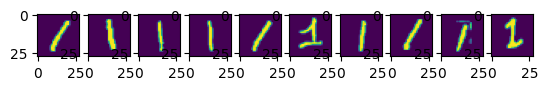

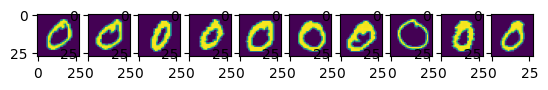

In [15]:
import matplotlib.pyplot as plt
for ii in range(10):
  plt.subplot(1, 10, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(10):
  plt.subplot(1, 10, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

In [23]:
import numpy as np

sum1 = np.sum(no1>0, (1,2))
sum0 = np.sum(no0>0, (1,2))

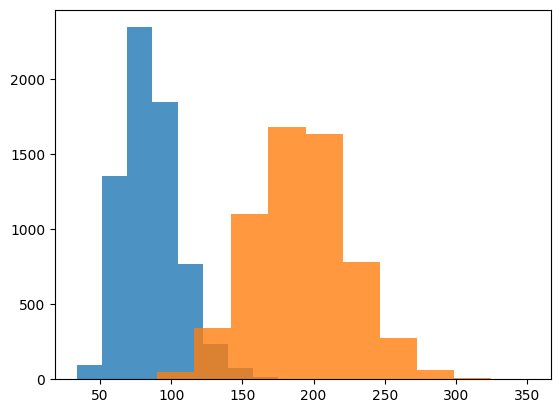

In [24]:
plt.hist(sum1, alpha=0.8);
plt.hist(sum0, alpha=0.8);

In [25]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]
  img2 = img2>0
  return img2
def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3)
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4
  hole = hull & ~ (img>0)
  return hole

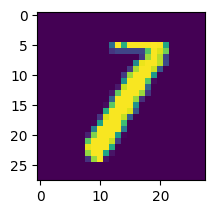

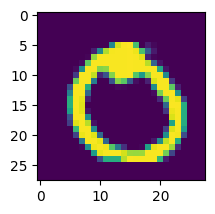

In [36]:
imgs = [no1[460,:,:],  no0[460,:,:]]
for img in imgs:
  plt.subplot(2,2,2)
  plt.imshow(getHolePixels(img))
  plt.subplot(2,2,2)
  plt.imshow(img)
  plt.show()

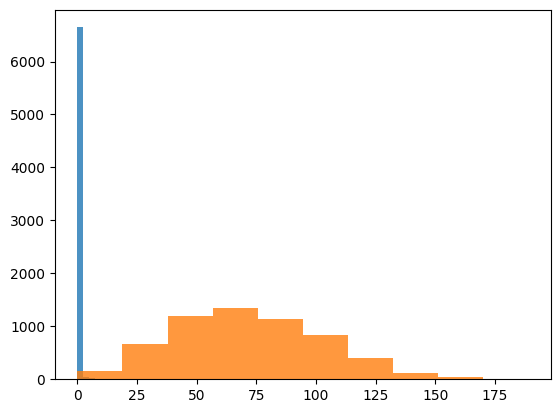

In [37]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
plt.hist(hole1, alpha=0.8);
plt.hist(hole0, alpha=0.8);

In [38]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3)
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4
  return hull

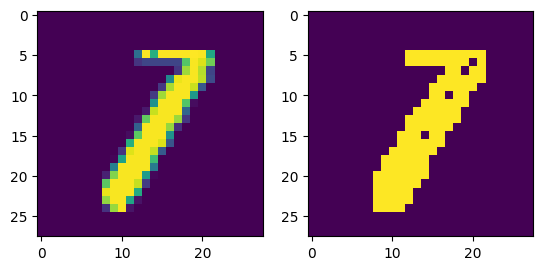

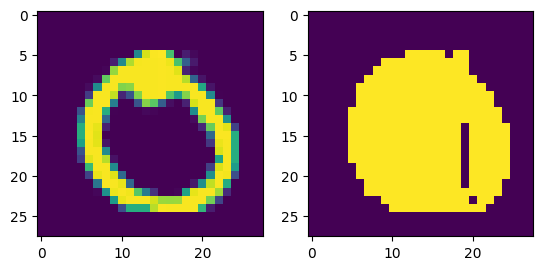

In [40]:
imgs = [no1[460,:,:],  no0[460,:,:]]
for img in imgs:
  plt.subplot(1,2,2)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.show()

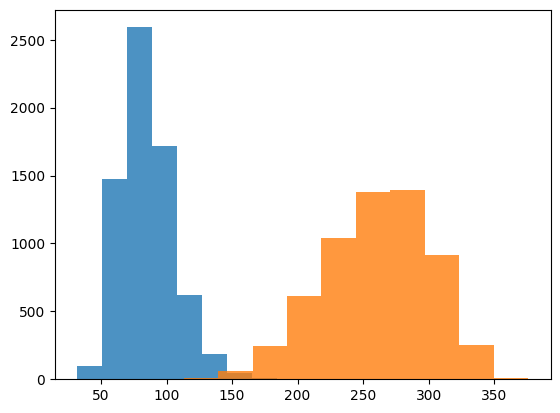

In [41]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])
plt.hist(hull1, alpha=0.8);
plt.hist(hull0, alpha=0.8);

In [43]:
def minus(a, b):
  return a & ~ b
def getBoundaryPixels(img):
  img = img.copy()>0
  rs = np.roll(img, 1, 1)
  ls = np.roll(img, -1 ,1)
  us = np.roll(img, -1, 0)
  ds= np.roll(img, 1, 0)
  boundary = minus(img, rs) | minus(img, ls) | minus(img, us) | minus(img, ds)
  return boundary

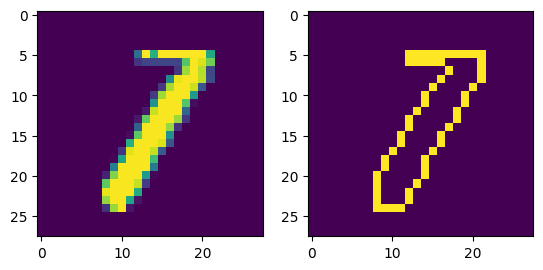

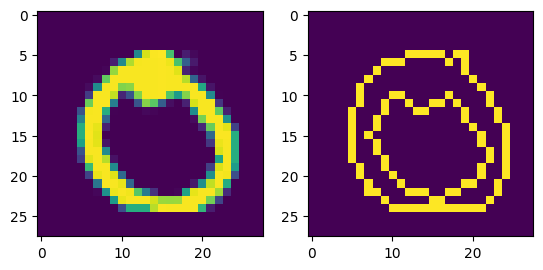

In [44]:
imgs = [no1[460,:,:],  no0[460,:,:]]
for img in imgs:
  plt.subplot(1,2,2)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.show()

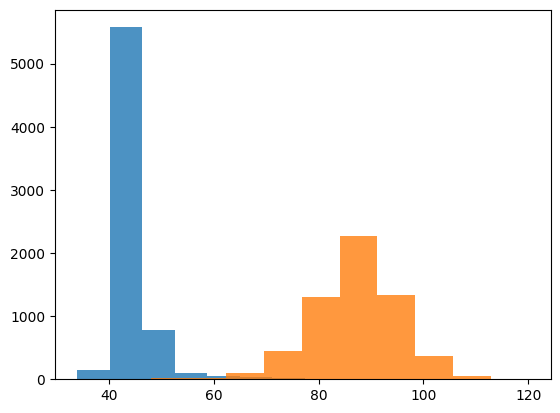

In [45]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])
plt.hist(bound1, alpha=0.8);
plt.hist(bound0, alpha=0.8);

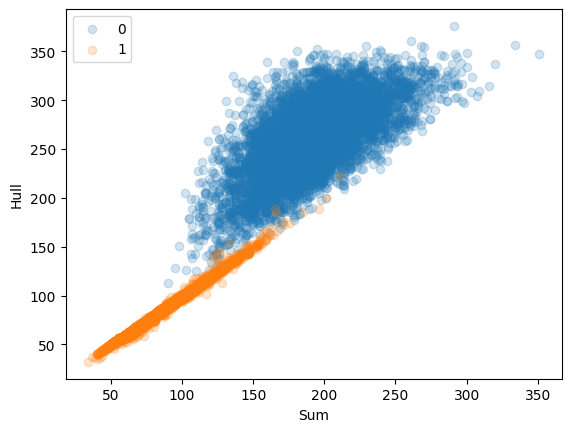

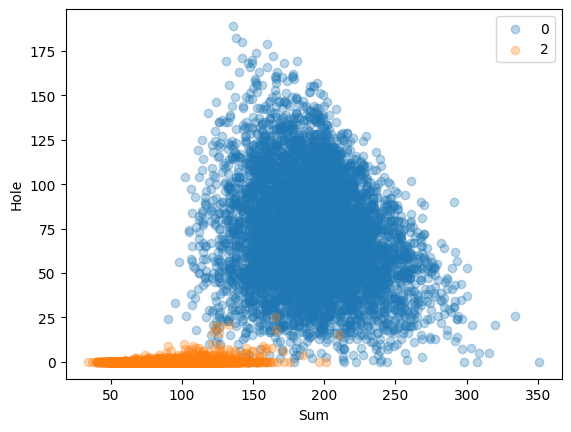

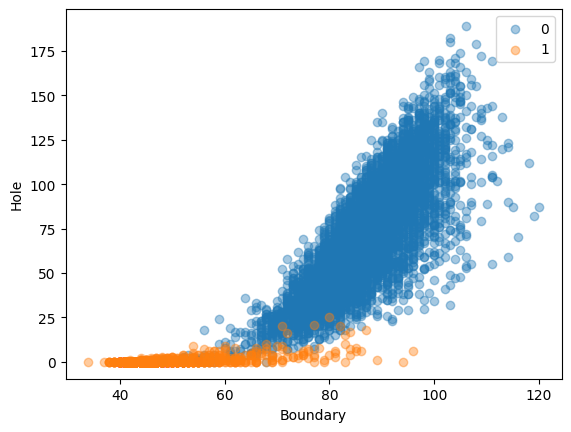

In [48]:
plt.scatter(sum0, hull0, alpha=0.2)
plt.scatter(sum1, hull1, alpha=0.2)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

plt.scatter(sum0, hole0, alpha=0.3)
plt.scatter(sum1, hole1, alpha=0.3)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','2'])
plt.show()

plt.scatter(bound0, hole0, alpha=0.4)
plt.scatter(bound1, hole1, alpha=0.4)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

In [51]:
import pandas as pd
import plotly.express as px

cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
                           columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

1. Using techniques like feature selection or feature importance ranking, we can train an ML model.The combination of features that results in the best model performance is known as the best combination of features.

2. Scatter plots, pair plots


3. We can. Featuring engineering is essential for ML.

4. Depends on the features. Some work and some don't.

5. You should make sure the ML model can support multi-class classification.